In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
import boto3
import io
import tensorflow as tf

In [2]:
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet50 import ResNet50
from keras import backend as K 

Using TensorFlow backend.


In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
s3 = boto3.resource('s3', region_name='us-east-2')
bucket = s3.Bucket('dfsp-lesiones-piel')

In [4]:
allFiles = bucket.objects.all()
X_data = []
#Cargado de Datos del S3 de Imagenes correspondientes a Entrenamiento
for object in allFiles:
    if ".jpg" in object.key and "benigna/train/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_benigna_train = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_benigna_train.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "carcinoma/train/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_carcinoma_train = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_carcinoma_train.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "dfsp/train/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_dfsp_train = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_dfsp_train.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "melanoma/train/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_melanoma_train = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_melanoma_train.shape)

(50, 224, 224, 3)
(50, 224, 224, 3)
(50, 224, 224, 3)
(50, 224, 224, 3)


In [5]:
X_data = []
#Cargado de Datos del S3 de Imagenes correspondientes a Pruebas
for object in allFiles:
    if ".jpg" in object.key and "benigna/test/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_benigna_test = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_benigna_test.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "carcinoma/test/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_carcinoma_test = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_carcinoma_test.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "dfsp/test/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_dfsp_test = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_dfsp_test.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "melanoma/test/" in object.key and not "validation" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_melanoma_test = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_melanoma_test.shape)

(10, 224, 224, 3)
(10, 224, 224, 3)
(10, 224, 224, 3)
(10, 224, 224, 3)


In [6]:
X_data = []
#Cargado de Datos del S3 de Imagenes correspondientes a Validacion
for object in allFiles:
    if ".jpg" in object.key and "benigna/validation/" in object.key :
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_benigna_validation = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_benigna_validation.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "carcinoma/validation/" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_carcinoma_validation = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_carcinoma_validation.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "dfsp/validation/" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_dfsp_validation = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_dfsp_validation.shape)
X_data = []
for object in allFiles:
    if ".jpg" in object.key and "melanoma/validation/" in object.key:
        file_stream = io.BytesIO()
        object.Object().download_fileobj(file_stream)
        img = mpimg.imread(file_stream, format="jpg")
        X_data.append(img) #AGREGAR A UN VECTOR
X_melanoma_validation = np.array(X_data) #TODAS LAS IMAGENES EN UN NUMPY ARRAY
print(X_melanoma_validation.shape)

(5, 224, 224, 3)
(5, 224, 224, 3)
(5, 224, 224, 3)
(5, 224, 224, 3)


In [7]:
#Creacion de etiquetas para cada clase
y_benigna_train = np.zeros(X_benigna_train.shape[0])
print(y_benigna_train)
y_carcinoma_train = np.ones(X_carcinoma_train.shape[0])
print(y_carcinoma_train)
y_dfsp_train = np.full(X_dfsp_train.shape[0],2,dtype=np.float64)
print(y_dfsp_train)
y_melanoma_train = np.full(X_melanoma_train.shape[0],3,dtype=np.float64)
print(y_melanoma_train)

y_benigna_test = np.zeros(X_benigna_test.shape[0])
print(y_benigna_test)
y_carcinoma_test = np.ones(X_carcinoma_test.shape[0])
print(y_carcinoma_test)
y_dfsp_test = np.full(X_dfsp_test.shape[0],2,dtype=np.float64)
print(y_dfsp_test)
y_melanoma_test = np.full(X_melanoma_test.shape[0],3,dtype=np.float64)
print(y_melanoma_test)

y_benigna_validation = np.zeros(X_benigna_validation.shape[0])
print(y_benigna_validation)
y_carcinoma_validation = np.ones(X_carcinoma_validation.shape[0])
print(y_carcinoma_validation)
y_dfsp_validation = np.full(X_dfsp_validation.shape[0],2,dtype=np.float64)
print(y_dfsp_validation)
y_melanoma_validation = np.full(X_melanoma_validation.shape[0],3,dtype=np.float64)
print(y_melanoma_validation)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.]
[3. 3. 3. 3. 3.]


In [8]:
#Juntar Clases y dividir en Entrenamiento, Pruebas y Validacion
X_train = np.concatenate((X_benigna_train, X_carcinoma_train, X_dfsp_train, X_melanoma_train), axis = 0)
print(X_train.shape)
y_train = np.concatenate((y_benigna_train, y_carcinoma_train, y_dfsp_train, y_melanoma_train), axis = 0)
print(y_train)

X_test = np.concatenate((X_benigna_test, X_carcinoma_test, X_dfsp_test, X_melanoma_test), axis = 0)
print(X_test.shape)
y_test = np.concatenate((y_benigna_test, y_carcinoma_test, y_dfsp_test, y_melanoma_test), axis = 0)
print(y_test)

X_validation = np.concatenate((X_benigna_validation, X_carcinoma_validation, X_dfsp_validation, X_melanoma_validation), axis = 0)
print(X_validation.shape)
y_validation = np.concatenate((y_benigna_validation, y_carcinoma_validation, y_dfsp_validation, y_melanoma_validation), axis = 0)
print(y_validation)

(200, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]
(40, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
(20, 224, 224, 3)
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3.]


In [9]:
#Mezclar datos entre Clases
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
print(X_train)
y_train = y_train[s]
print(y_train)

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
print(X_test)
y_test = y_test[s]
print(y_test)

s = np.arange(X_validation.shape[0])
np.random.shuffle(s)
X_validation = X_validation[s]
print(X_test)
y_validation = y_validation[s]
print(y_test)

[[[[193 148 153]
   [193 149 150]
   [194 150 151]
   ...
   [191 146 141]
   [194 151 145]
   [191 151 143]]

  [[196 151 154]
   [190 146 147]
   [190 146 147]
   ...
   [194 150 147]
   [194 150 147]
   [194 150 147]]

  [[197 152 155]
   [189 145 146]
   [190 146 145]
   ...
   [193 150 144]
   [194 151 145]
   [193 150 144]]

  ...

  [[186 128 116]
   [180 124 111]
   [181 129 116]
   ...
   [182 128 126]
   [182 122 124]
   [183 119 120]]

  [[185 127 116]
   [179 123 108]
   [181 128 114]
   ...
   [182 131 128]
   [181 122 124]
   [183 119 120]]

  [[185 129 116]
   [181 125 112]
   [185 129 116]
   ...
   [187 128 130]
   [185 125 125]
   [183 123 125]]]


 [[[223 164 160]
   [221 168 160]
   [223 171 160]
   ...
   [218 150 131]
   [223 152 134]
   [216 152 127]]

  [[226 172 162]
   [224 174 167]
   [227 176 172]
   ...
   [220 148 133]
   [224 158 144]
   [219 156 138]]

  [[224 176 166]
   [222 178 169]
   [226 182 173]
   ...
   [219 150 135]
   [222 160 145]
   [218 152

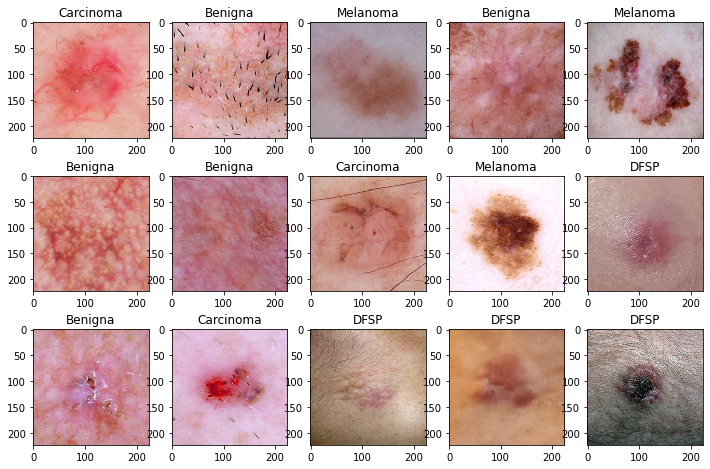

In [10]:
#Mostrar las 15 primeras lesiones de la piel para mostrar sus diferencias
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benigna')
    if y_train[i] == 1:
        ax.title.set_text('Carcinoma')
    if y_train[i] == 2:
        ax.title.set_text('DFSP')
    if y_train[i] == 3:
        ax.title.set_text('Melanoma')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [11]:
#Aplicar One hot encoder a las etiquetas
y_train = to_categorical(y_train, num_classes= 4)
print(y_train)
y_test = to_categorical(y_test, num_classes= 4)
print(y_test)
y_validation = to_categorical(y_validation, num_classes= 4)
print(y_validation)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0.

In [12]:
##NORMALIZAR
X_train = X_train/255.
print(X_train)
X_test = X_test/255.
print(X_test)

[[[[0.75686275 0.58039216 0.6       ]
   [0.75686275 0.58431373 0.58823529]
   [0.76078431 0.58823529 0.59215686]
   ...
   [0.74901961 0.57254902 0.55294118]
   [0.76078431 0.59215686 0.56862745]
   [0.74901961 0.59215686 0.56078431]]

  [[0.76862745 0.59215686 0.60392157]
   [0.74509804 0.57254902 0.57647059]
   [0.74509804 0.57254902 0.57647059]
   ...
   [0.76078431 0.58823529 0.57647059]
   [0.76078431 0.58823529 0.57647059]
   [0.76078431 0.58823529 0.57647059]]

  [[0.77254902 0.59607843 0.60784314]
   [0.74117647 0.56862745 0.57254902]
   [0.74509804 0.57254902 0.56862745]
   ...
   [0.75686275 0.58823529 0.56470588]
   [0.76078431 0.59215686 0.56862745]
   [0.75686275 0.58823529 0.56470588]]

  ...

  [[0.72941176 0.50196078 0.45490196]
   [0.70588235 0.48627451 0.43529412]
   [0.70980392 0.50588235 0.45490196]
   ...
   [0.71372549 0.50196078 0.49411765]
   [0.71372549 0.47843137 0.48627451]
   [0.71764706 0.46666667 0.47058824]]

  [[0.7254902  0.49803922 0.45490196]
   [0.7

In [13]:
# #Aumentando Datos para expandir el tamaño del Dataset
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# datagen.fit(X_train)

In [14]:
##Creando la función con las capas de la CNN
#Se tienen parametros como el tamaño de entrada (224,224,3), el learning rate 0.0001, el numero de clases 4, 
#  el tipo de inizializacion normal, la funcion de activacion RELU y el algoritmo optimizador ADAM.
# Se utilizan una capa convolucional, seguida de un Maxpool, y un dropout

def cnn(input_shape= (224,224,3), lr = 1e-3, num_classes= 4,
          init= 'normal', activ= 'relu', optim= 'adam'):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',input_shape=input_shape,
                     activation= activ, kernel_initializer='glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', 
                     activation =activ, kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=init))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()

    if optim == 'rmsprop':
        optimizer = RMSprop(lr=lr)

    else:
        optimizer = Adam(lr=lr)

    model.compile(optimizer = optimizer ,loss = "binary_crossentropy", metrics=["accuracy"])
    return model

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 64)        0         
_____________________

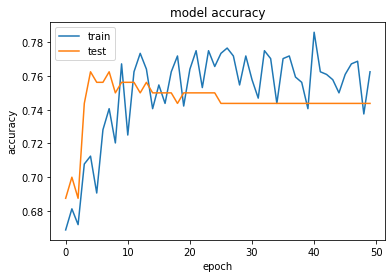

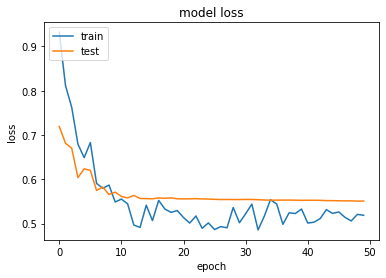

In [15]:
#Definiendo los hiperparametros necesarios para entrenar el Modelo

input_shape = (224,224,3)
lr = 1e-5
init = 'normal'
activ = 'relu'
optim = 'adam'
epochs = 50
batch_size = 10

model = cnn(lr=lr, init= init, activ= activ, optim=optim, input_shape= input_shape)

history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs= epochs, batch_size= batch_size, verbose=0, 
                    callbacks=[learning_rate_reduction]
                   )
                   
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_validation, y_validation, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

20/20 [==============================] - 0s 21ms/step
Validation: accuracy = 0.800000  ;  loss_v = 3.206048
Test: accuracy = 0.787500  ;  loss = 0.484364


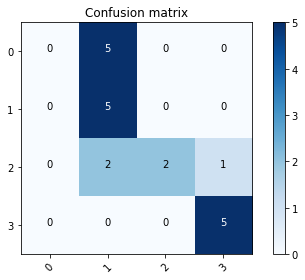

In [17]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

# Predict the values from the validation dataset
Y_pred = model.predict(X_validation)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validation,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(4)) 

Text(0, 0.5, 'Fraction classified incorrectly')

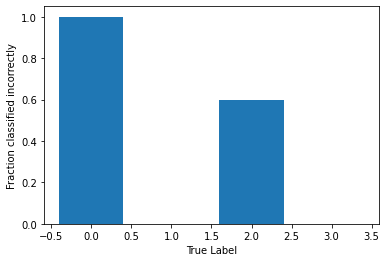

In [18]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(4),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')